In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import sys
import math
import datetime as datetime
from datetime import datetime as dt
from datetime import timedelta as td
from datetime import date as dater

#get the dataset that I compiled earlier
df = pd.read_csv(r'C:/Users/enoch/Desktop/MLvsCOVID/completedataset.csv')
#maybe population density will help us
mydf = pd.read_csv(r'C:/Users/enoch/Desktop/MLvsCOVID/density.csv')
thing=[]

#cleaning density data
for county in mydf['County']:
    thing.append(county[:county.index(', CA')])
    
mydf=mydf.drop(columns=['County'])
mydf['county']=thing
mydf=mydf.set_index(['county'])

df=df.set_index(["county","date"])
relevantdate = df.index.tolist() 
bchanges =[]
for date in relevantdate:
    newdate = mydf.loc[date[0]].loc['Population Density']
        
    bchanges.append(newdate)    
df['density']=bchanges

df=df.drop(columns=['deaths','new_deaths'])
df


retailandrec  groceryandpharm  parks  transit  work  \
county  date                                                              
Alameda 2020-02-20           1.0              1.0   13.0      2.0   0.0   
        2020-02-21           1.0              1.0    8.0     -1.0   3.0   
        2020-02-26           2.0              2.0   20.0      3.0   2.0   
        2020-02-28           3.0              5.0    8.0      0.0   4.0   
        2020-02-29           2.0              7.0   14.0     -4.0   3.0   
...                          ...              ...    ...      ...   ...   
Yuba    2020-07-13         -13.0              8.0    NaN     -9.0 -32.0   
        2020-07-14          -9.0              8.0    NaN     -8.0 -31.0   
        2020-07-15          -9.0              9.0    NaN    -14.0 -34.0   
        2020-07-16         -12.0             18.0    NaN    -12.0 -33.0   
        2020-07-17         -13.0              9.0    NaN    -17.0 -34.0   

                    residential  confirmed_cases  new_confirmed_cases  density  
county  date                                                                    
Alameda 2020-02-20          0.0                0                  0.0   1898.5  
        2020-02-21          0.0                0                  0.0   1898.5  
        2020-02-26         -1.0                0                  0.0   1898.5  
        2020-02-28          0.0                0                  0.0   1898.5  
        2020-02-29         -1.0                0                  0.0   1898.5  
...                         ...              ...                  ...      ...  
Yuba    2020-07-13          6.0              211                 13.0    113.5  
        2020-07-14          7.0              221                 10.0    113.5  
        2020-07-15          7.0              231                 10.0    113.5  
        2020-07-16          7.0              236                  5.0    113.5  
        2020-07-17          8.0              252                 16.0    113.5  

[7080 rows x 9 columns]

In [2]:
string=""
def adddelaycolumn(numdays):
    relevantdate = df.index.tolist() 
    bchanges =[]

    for date in relevantdate:

        newdate = dt.strptime(date[1], '%Y-%m-%d')+td(days=numdays)
        #print (newdate)
       
        try:
            bchanges.append(df.loc[date[0]].loc[str(newdate)[0:10]].new_confirmed_cases)
        except:
            bchanges.append(np.nan)
    

    string= 'dayslaternewcases'
    #print(bchanges) 
    df[string]=bchanges


num=11
adddelaycolumn(num)
df


retailandrec  groceryandpharm  parks  transit  work  \
county  date                                                              
Alameda 2020-02-20           1.0              1.0   13.0      2.0   0.0   
        2020-02-21           1.0              1.0    8.0     -1.0   3.0   
        2020-02-26           2.0              2.0   20.0      3.0   2.0   
        2020-02-28           3.0              5.0    8.0      0.0   4.0   
        2020-02-29           2.0              7.0   14.0     -4.0   3.0   
...                          ...              ...    ...      ...   ...   
Yuba    2020-07-13         -13.0              8.0    NaN     -9.0 -32.0   
        2020-07-14          -9.0              8.0    NaN     -8.0 -31.0   
        2020-07-15          -9.0              9.0    NaN    -14.0 -34.0   
        2020-07-16         -12.0             18.0    NaN    -12.0 -33.0   
        2020-07-17         -13.0              9.0    NaN    -17.0 -34.0   

                    residential  confirmed_cases  new_confirmed_cases  \
county  date                                                            
Alameda 2020-02-20          0.0                0                  0.0   
        2020-02-21          0.0                0                  0.0   
        2020-02-26         -1.0                0                  0.0   
        2020-02-28          0.0                0                  0.0   
        2020-02-29         -1.0                0                  0.0   
...                         ...              ...                  ...   
Yuba    2020-07-13          6.0              211                 13.0   
        2020-07-14          7.0              221                 10.0   
        2020-07-15          7.0              231                 10.0   
        2020-07-16          7.0              236                  5.0   
        2020-07-17          8.0              252                 16.0   

                    density  dayslaternewcases  
county  date                                    
Alameda 2020-02-20   1898.5                0.0  
        2020-02-21   1898.5                1.0  
        2020-02-26   1898.5                0.0  
        2020-02-28   1898.5                2.0  
        2020-02-29   1898.5                0.0  
...                     ...                ...  
Yuba    2020-07-13    113.5                NaN  
        2020-07-14    113.5                NaN  
        2020-07-15    113.5                NaN  
        2020-07-16    113.5                NaN  
        2020-07-17    113.5                NaN  

[7080 rows x 10 columns]

In [3]:
#log everything so that the distribution is more normal!

relevantdate = df.index.tolist() 
bchanges =[]

for date in relevantdate:
    #print(df.loc[date[0]].loc[date[1]].new_confirmed_cases)
    try:
        logged = math.log(df.loc[date[0]].loc[date[1]].dayslaternewcases+0.1)       
        bchanges.append(logged)
    except:
        bchanges.append(np.nan)
    

df['11dayslogged']=bchanges


bchanges =[]

for date in relevantdate:
    #print(df.loc[date[0]].loc[date[1]].new_confirmed_cases)
    try:
        logged = math.log(df.loc[date[0]].loc[date[1]].confirmed_cases+0.1)       
        bchanges.append(logged)
    except:
        bchanges.append(np.nan)
    

df['confirmedlogged']=bchanges

bchanges =[]

for date in relevantdate:
    #print(df.loc[date[0]].loc[date[1]].new_confirmed_cases)
    try:
        logged = math.log(df.loc[date[0]].loc[date[1]].density+0.1)       
        bchanges.append(logged)
    except:
        bchanges.append(np.nan)
    

df['densitylogged']=bchanges

df=df.drop(columns=['dayslaternewcases','new_confirmed_cases','confirmed_cases','density'])


print(df)

                    retailandrec  groceryandpharm  parks  transit  work  \
county  date                                                              
Alameda 2020-02-20           1.0              1.0   13.0      2.0   0.0   
        2020-02-21           1.0              1.0    8.0     -1.0   3.0   
        2020-02-26           2.0              2.0   20.0      3.0   2.0   
        2020-02-28           3.0              5.0    8.0      0.0   4.0   
        2020-02-29           2.0              7.0   14.0     -4.0   3.0   
...                          ...              ...    ...      ...   ...   
Yuba    2020-07-13         -13.0              8.0    NaN     -9.0 -32.0   
        2020-07-14          -9.0              8.0    NaN     -8.0 -31.0   
        2020-07-15          -9.0              9.0    NaN    -14.0 -34.0   
        2020-07-16         -12.0             18.0    NaN    -12.0 -33.0   
        2020-07-17         -13.0              9.0    NaN    -17.0 -34.0   

                    resi

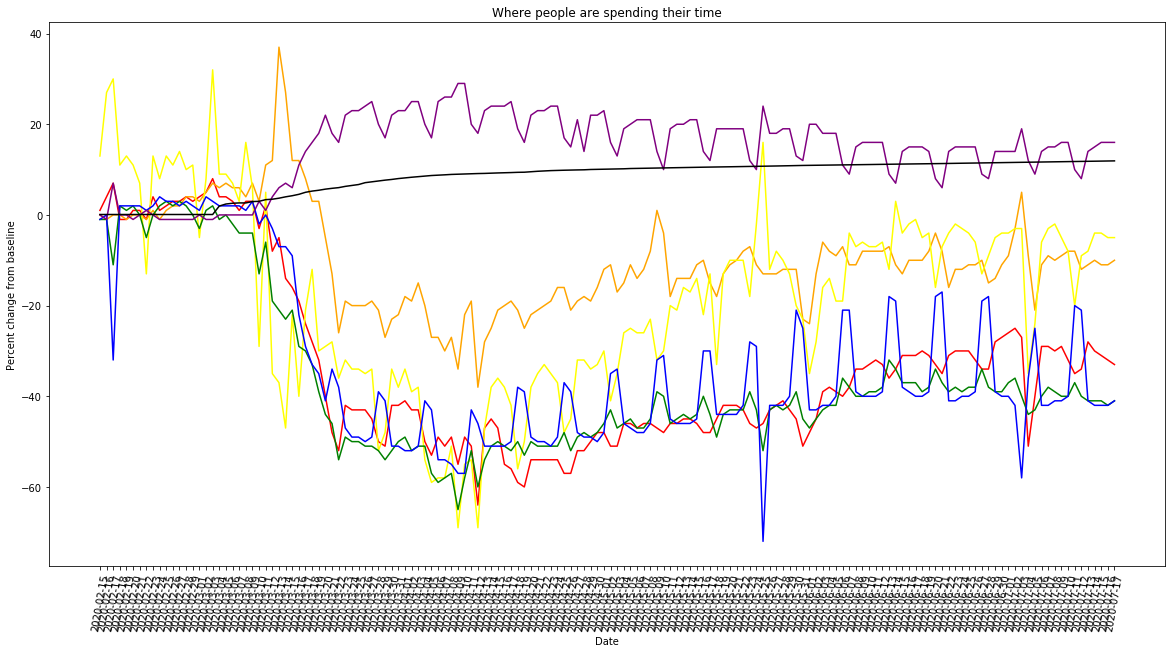

In [4]:
#quick visualization check

plt.figure(figsize=(20,10))
la=df.loc['Los Angeles']
sns.lineplot(data=la['retailandrec'],color='red')
sns.lineplot(data=la['groceryandpharm'],color='orange')
sns.lineplot(data=la['parks'],color='yellow')
sns.lineplot(data=la['transit'],color='green')
sns.lineplot(data=la['work'],color='blue')
sns.lineplot(data=la['residential'],color='purple')
sns.lineplot(data=la['confirmedlogged'],color='black')
plt.xlabel("Date")
plt.ylabel("Percent change from baseline")
plt.xticks(rotation=80)
plt.title("Where people are spending their time")
plt.show()


In [5]:
# Remove rows with missing target, separate target from predictors

needsprediction=df[df['11dayslogged'].isnull()]
#print(needsprediction)
testing=df[df['11dayslogged'].notnull()]

In [6]:
#drop values with no target
df.dropna(subset=['11dayslogged'],inplace=True)
#print(df)


In [7]:
X = df.drop(columns=['11dayslogged'])
y=df['11dayslogged']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)


In [8]:

#Create imputer
imputer = SimpleImputer()

imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(imputer.transform(X_valid))

#imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns
imputed_X_train.index = X_train.index
imputed_X_valid.index = X_valid.index

print(imputed_X_valid)

                       retailandrec  groceryandpharm      parks    transit  \
county     date                                                              
Mariposa   2020-05-05    -30.838837        -3.296919 -55.000000 -28.144811   
Placer     2020-04-21    -54.000000        -1.000000  19.000000 -20.000000   
Inyo       2020-05-08    -30.838837        -3.296919 -34.000000 -28.144811   
Yuba       2020-06-22     -6.000000         9.000000   2.753724  -3.000000   
Yolo       2020-03-30    -36.000000       -21.000000   3.000000 -32.000000   
...                             ...              ...        ...        ...   
Sacramento 2020-06-06    -32.000000         4.000000  26.000000 -29.000000   
Yuba       2020-03-30    -31.000000       -11.000000  14.000000 -17.000000   
Fresno     2020-06-17    -21.000000         4.000000   6.000000 -16.000000   
Yuba       2020-05-17    -12.000000         4.000000  39.000000 -28.144811   
Santa Cruz 2020-04-09    -51.000000       -23.000000 -49.000000 

In [9]:
print("MAE (Imputation):")
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(imputed_X_train, y_train)
preds = model.predict(imputed_X_valid)
print(mean_absolute_error(y_valid, preds))
#disclaimer, mean absolute error is hard to interpret because everything has been natral logged

MAE (Imputation):
1.152662983082411


In [10]:
lookhere=needsprediction['11dayslogged']
testing=needsprediction.drop(columns=['11dayslogged'])
testing=pd.DataFrame(imputer.transform(testing))
#testing.columns = needsprediction.columns
testing['predictions']= math.e**model.predict(testing)
testing.index = needsprediction.index

print(testing)



                       0     1          2     3     4     5         6  \
county  date                                                            
Alameda 2020-04-03 -51.0 -17.0 -10.000000 -70.0 -64.0  30.0  6.093795   
        2020-07-07 -38.0  -9.0  39.000000 -58.0 -55.0  21.0  8.842908   
        2020-07-08 -39.0 -12.0  33.000000 -58.0 -53.0  21.0  8.888081   
        2020-07-09 -38.0 -10.0  38.000000 -60.0 -54.0  21.0  8.910194   
        2020-07-10 -41.0 -11.0  26.000000 -59.0 -50.0  20.0  8.925335   
...                  ...   ...        ...   ...   ...   ...       ...   
Yuba    2020-07-13 -13.0   8.0   2.753724  -9.0 -32.0   6.0  5.352332   
        2020-07-14  -9.0   8.0   2.753724  -8.0 -31.0   7.0  5.398615   
        2020-07-15  -9.0   9.0   2.753724 -14.0 -34.0   7.0  5.442851   
        2020-07-16 -12.0  18.0   2.753724 -12.0 -33.0   7.0  5.464255   
        2020-07-17 -13.0   9.0   2.753724 -17.0 -34.0   8.0  5.529826   

                           7  predictions  
county

In [11]:
def adddelaycolumn(numdays):
    relevantdate = testing.index.tolist() 
    bchanges =[]

    for date in relevantdate:

        newdate = dt.strptime(date[1], '%Y-%m-%d')+td(days=numdays)
        #print (newdate)
        #print(str(newdate)[0:10])
        try:
            bchanges.append(newdate)
        except:
            bchanges.append(np.nan)
    

    string= str(numdays)+'dayslaternewcases'
    #print(changes) 
    testing['Date']=bchanges

   


adddelaycolumn(11)
pd.options.display.max_rows = 60
print(testing[['Date','predictions']])
#reformatted to display predictions, 'date' refers to the date when predictions are calculated from
#'Date' refers to the date for which the prediction is attempting to calculate new cases, 11 days later

                         Date  predictions
county  date                              
Alameda 2020-04-03 2020-04-14    43.875515
        2020-07-07 2020-07-18   129.150321
        2020-07-08 2020-07-19    70.068428
        2020-07-09 2020-07-20    67.354716
        2020-07-10 2020-07-21   110.986194
...                       ...          ...
Yuba    2020-07-13 2020-07-24    12.315199
        2020-07-14 2020-07-25     7.099508
        2020-07-15 2020-07-26     5.682977
        2020-07-16 2020-07-27     6.303569
        2020-07-17 2020-07-28     5.062890

[667 rows x 2 columns]


In [12]:
jing=testing
jing=jing.reset_index()
jing=jing.set_index(['county','Date'])
jing.loc['Los Angeles'][['predictions']]

,predictions
Date,
2020-07-18,3153.471335
2020-07-19,3124.550156
2020-07-20,3223.292118
2020-07-21,3204.557373
2020-07-22,2783.642762
2020-07-23,2562.872115
2020-07-24,2968.580819
2020-07-25,3181.509068
2020-07-26,3176.832796


In [13]:
import os

os.system('jupyter nbconvert --to html LogEverything.ipynb')

0